In [1]:
from half_edge import *

In [2]:
from pytket.circuit.display import render_circuit_jupyter

Vertex ordering by degree (descending), ties randomized:
[13, 10, 8, 14, 11, 9, 12, 7, 2, 4, 3, 1, 6, 5]
Vertex to main qubit mapping: {13: 1, 10: 4, 8: 7, 14: 6, 11: 10, 9: 13, 12: 16, 7: 9}

Extracted circuit:
  Total qubits: 17
  Total gates: 39
  Final mapping: {2: 10, 4: 5, 3: 2, 1: 14, 6: 8, 5: 15}


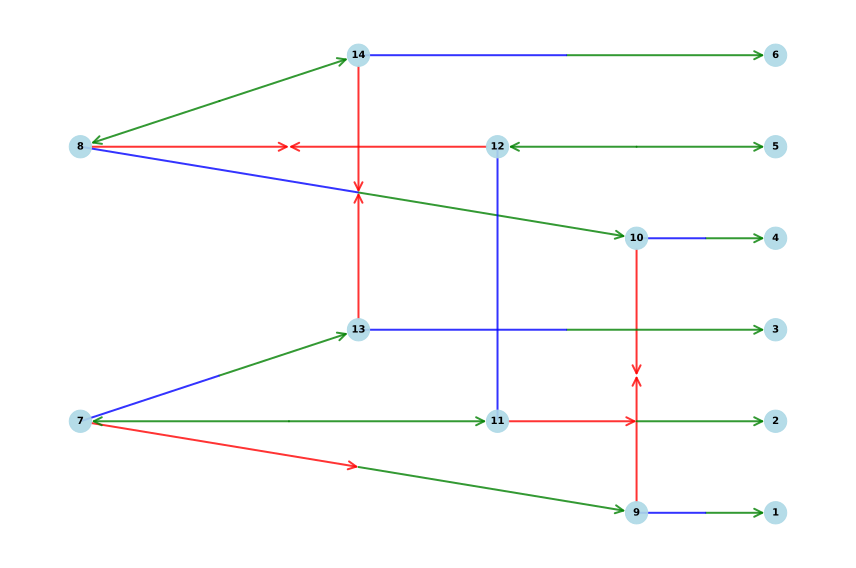

In [3]:
"""Example usage of the split_directed_edges function on a ZX-diagram."""
zx_graph = generate_zx_graph(6, None)
# zx_graph = generate_zx_graph(6, None)
if zx_graph is None:
    raise RuntimeError("Failed to generate ZX graph")

G, pos, node_types = zx_diagram_to_networkx_graph(zx_graph)

# Random degree-based ordering of the original vertices
ordering = print_random_degree_ordering(G, seed=42)

# Get colored DiGraph for circuit extraction
colored_G = assign_half_edge_coloring(G, seed=42)

# Extract circuit from the colored graph (before splitting)
builder, final_mapping = extract_circuit(colored_G, ordering)
print(f"\nExtracted circuit:")
print(f"  Total qubits: {len(builder.qubit_alive)}")
print(f"  Total gates: {len(builder.gates)}")
print(f"  Final mapping: {final_mapping}")

# # Convert to pytket Circuit and visualize
# circ = builder.to_tket()
# render_circuit_jupyter(circ)

# Split edges for visualization
new_G, new_pos = split_directed_edges(G, pos, color_seed=42)
visualize_split_graph(new_G, new_pos)

In [8]:
import pyzx as zx
c = builder.to_pyzx()
# zx.draw(c)
g = c.to_graph()

zx.id_simp(g)
zx.draw(g)
degree1_simp(g)

# zx.full_reduce(g)
compress_rows(g)
zx.draw(g)
zx.full_reduce(g)
zx.draw(g)